# Logistic Regression to Predict Student Admission

In this tutorial we will try to come up with a model which will help us predict whether a student will get admission in college depending on two exam scores.

Lets visualize the data first

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [11]:
file_name = './data.txt'
data = np.loadtxt(file_name, delimiter=',')
score1_values = data[:, 0]
score2_values = data[:, 1]
results = data[:, 2]

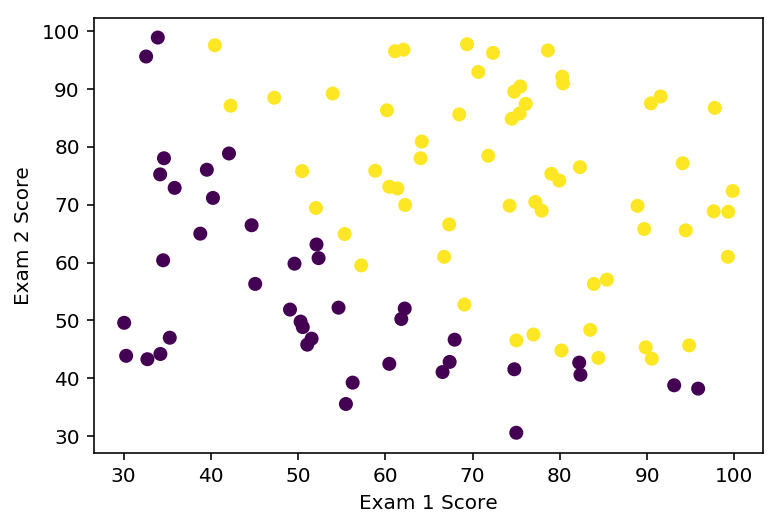

In [12]:
#Plot the data
plt.scatter(score1_values, score2_values, c = results)
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.show()

As we can see in above graph we can fit a linear model to separate the data. This linear model will be a decision boundary.  

We will try to minimize a cost function.  
![Logistic_Regression_cost_function](./cost_function.png)

The Cost function is J(Theta).  

In [13]:
tf.reset_default_graph()

epochs = 5000;
learning_rate = 0.01
display_error = 100
total_examples = len(score1_values)

score1 = tf.placeholder(tf.float32, name='score1')
score2 = tf.placeholder(tf.float32, name='score2')
y = tf.placeholder(tf.float32, name='result')

W1 = tf.Variable(0.0, name='W1')
W2 = tf.Variable(0.0, name='W2')
b = tf.Variable(0.0, name='b')

h = tf.sigmoid(W1 * score1 + W2 * score2 + b)

cost = -(tf.reduce_sum(y * tf.log(h) + (1 - y ) * tf.log(1 - h))) / total_examples
tf.summary.scalar('cost', cost)
train_op = tf.train.AdamOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()
merged_summary = tf.summary.merge_all()
writer = tf.summary.FileWriter('./graphs')
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    writer.add_graph(sess.graph)
    feed_dict = {score1: score1_values, score2: score2_values, y: results} 
    initial_error = sess.run(cost, feed_dict=feed_dict)
    print("Initial Error is {0}".format(initial_error))
    for epoch in range(epochs):
        sess.run(train_op, feed_dict=feed_dict)
        if epoch % display_error == 0:
            (current_error, s) = sess.run([cost, merged_summary], feed_dict=feed_dict)
            writer.add_summary(s, epoch)
            print("Current Error is {0}".format(current_error))
    final_error = sess.run(cost, feed_dict=feed_dict)
    print("Final Error is {0}".format(final_error))
    saver.save(sess, './model.ckpt')
writer.close()


Initial Error is 0.6931474208831787
Current Error is 0.6713591814041138
Current Error is 0.5814186930656433
Current Error is 0.5311222076416016
Current Error is 0.48776406049728394
Current Error is 0.451315313577652
Current Error is 0.4208146929740906
Current Error is 0.39521855115890503
Current Error is 0.3736058473587036
Current Error is 0.3552184998989105
Current Error is 0.3394504189491272
Current Error is 0.32582223415374756
Current Error is 0.313955694437027
Current Error is 0.30355146527290344
Current Error is 0.2943713068962097
Current Error is 0.28622403740882874
Current Error is 0.2789555788040161
Current Error is 0.272440105676651
Current Error is 0.2665747106075287
Current Error is 0.26127421855926514
Current Error is 0.2564677298069
Current Error is 0.25209569931030273
Current Error is 0.24810799956321716
Current Error is 0.24446196854114532
Current Error is 0.2411211133003235
Current Error is 0.23805415630340576
Current Error is 0.23523390293121338
Current Error is 0.2326

In [14]:
tf.reset_default_graph()

# Do a prediction
score1 = tf.placeholder(tf.float32, name='score1')
score2 = tf.placeholder(tf.float32, name='score2')

W1 = tf.Variable(0.0, name='W1')
W2 = tf.Variable(0.0, name='W2')
b = tf.Variable(0.0, name='b')

h = tf.sigmoid(W1 * score1 + W2 * score2 + b)

saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, './model.ckpt')
    prob = sess.run(h, feed_dict={score1: 45, score2: 85})
    print("The probability for student getting admission with score1 of 45 and score2 of 85 is {0}".format(prob))

INFO:tensorflow:Restoring parameters from ./model.ckpt
The probability for student getting admission with score1 of 45 and score2 of 85 is 0.7422035336494446


INFO:tensorflow:Restoring parameters from ./model.ckpt


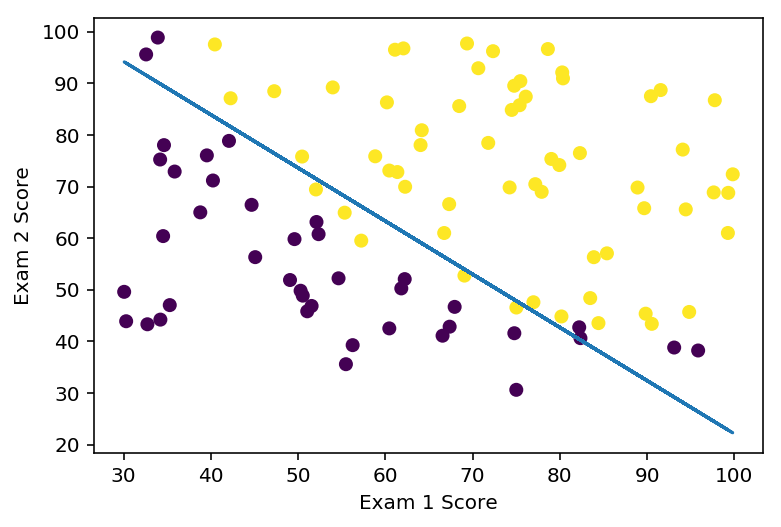

In [15]:
tf.reset_default_graph()

# Plot Decision Boundary
W1 = tf.Variable(0.0, name='W1')
W2 = tf.Variable(0.0, name='W2')
b = tf.Variable(0.0, name='b')

x1 = tf.placeholder(tf.float32, name='x1')
decision_boundary_y = -(b + W1 * x1) / W2
saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, './model.ckpt')
    plt.scatter(score1_values, score2_values, c = results)
    plt.plot(score1_values, sess.run(decision_boundary_y, feed_dict={x1: score1_values}))
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')
    plt.show()